# [Detecting the difficulty level of French texts](https://www.kaggle.com/c/detecting-the-difficulty-level-of-french-texts/overview/evaluation)
## Exploratory analysis
---
In this notebook, we will do some exploratory analysis, in order to identify any pattern that could help us to predict the difficulty of a sentence.

In [9]:
import pandas as pd
import spacy
from spacy import displacy
import string
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter

nlp = spacy.load('fr_core_news_md')


In [10]:
trainDf = pd.read_csv("https://raw.githubusercontent.com/LaCrazyTomato/Group-Project-DM-ML-2021/main/data/training_data.csv")
testDf = pd.read_csv("https://raw.githubusercontent.com/LaCrazyTomato/Group-Project-DM-ML-2021/main/data/unlabelled_test_data.csv")

In [14]:
for i, row in trainDf.sample(10).iterrows():
    print(row.sentence)
    print(f"Difficulty: {row.difficulty}\n")

Moi c'est Pierre.
Difficulty: A1

On a beau dire, mais la France ça reste quand même le pays des 400 fromages.
Difficulty: B1

Une partie de l'énergie fournie pour se déplacer est transformée en chaleur.
Difficulty: B1

Ainsi, ils gagnent en effcacité et l'employeur en profte.
Difficulty: B2

Par ailleurs, Platon, dans Protagoras, relate l'apparition de la technique, et donc du travail, chez les Hommes dans "le mythe de Prométhée"
Difficulty: C2

Non, elle est fleuriste.
Difficulty: A1

Les sénateurs élus au scrutin majoritaire, dont le siège devient vacant pour cause de décès, d'acceptation des fonctions de membre du Conseil constitutionnel ou de Défenseur des droits ou de prolongation au-delà du délai de six mois d'une mission temporaire confiée par le Gouvernement sont remplacés par les personnes élues en même temps qu'eux à cet effet.
Difficulty: C2

Héloïse Dufour, donc je le disais, vous êtes biologiste.
Difficulty: C1

L'invincible sommeil m'a saisi, suivi bientôt de l'atroce ré

In [22]:
trainDf.difficulty.value_counts() / len(trainDf)

A1    0.169375
C2    0.168125
C1    0.166250
A2    0.165625
B1    0.165625
B2    0.165000
Name: difficulty, dtype: float64

## 1. Sentences features vs difficulties

### 1.1 Number of Word/Punctation vs difficulty

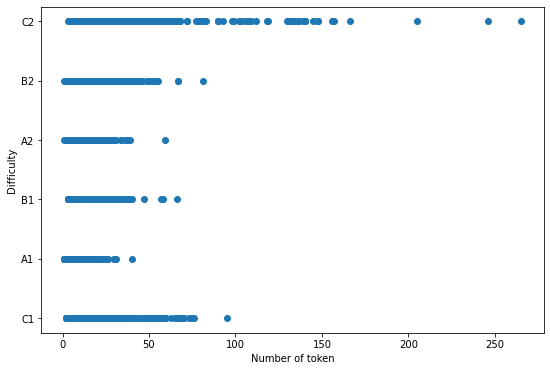

In [5]:
fig, ax = plt.subplots(1,1, figsize=(9,6))

# split on space (keeps punctations)
nbWords = [len(sent.split(" ")) for sent in trainDf.sentence]
difficulties = [dif for dif in trainDf.difficulty]

ax.set_xlabel("Number of token")
ax.set_ylabel("Difficulty")

ax.scatter(nbWords, difficulties)


### 1.2 Number of unique word/punctation vs difficulty

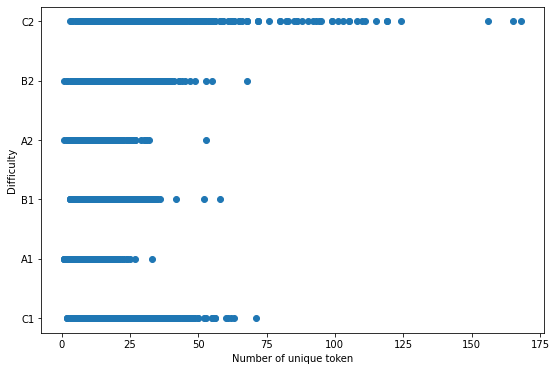

In [7]:
uniqueWords = []
difficulties = []

for i, row in trainDf.iterrows():
    nbUniqueWords = 0
    prev_words = []
    for word in row.sentence.split(" "):
        if word not in prev_words:
            nbUniqueWords += 1
        prev_words.append(word)

    uniqueWords.append(nbUniqueWords)
    difficulties.append(row.difficulty)
    
    
fig, ax = plt.subplots(1,1, figsize=(9,6))

ax.set_xlabel("Number of unique token")
ax.set_ylabel("Difficulty")


ax.scatter(uniqueWords, difficulties)

### 1.3 Number of sentences vs difficulty

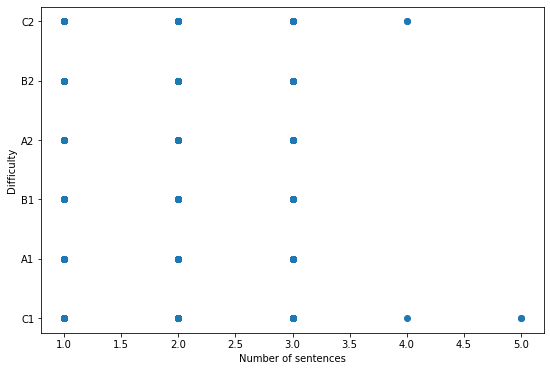

In [8]:
nbSentencesList = []
difficulties = []

for i, row in trainDf.iterrows():
    nbSentencesList.append(len(row.sentence.split(".")))
    difficulties.append(row.difficulty)


fig, ax = plt.subplots(1,1, figsize=(9,6))

ax.set_xlabel("Number of sentences")
ax.set_ylabel("Difficulty")

ax.scatter(nbSentencesList, difficulties)

### 1.4 Analysis using Spacy

https://spacy.io/models/fr#fr_core_news_md

#### 1.4.1 Part-of-speech

C:\Users\Alex\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alex\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


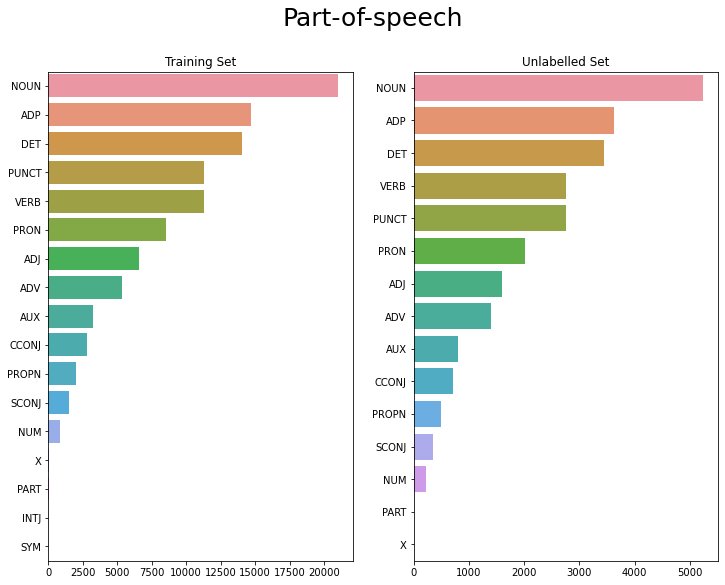

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12, 9))

c = Counter()
for sent in testDf.sentence:
    c += Counter([token.pos_ for token in nlp(sent)])

c = c.most_common()

c2 = Counter()
for sent in trainDf.sentence:
    c2 += Counter([token.pos_ for token in nlp(sent)])

c2 = c2.most_common()

x = [i[1] for i in c]
y = [i[0] for i in c]

x2 = [i[1] for i in c2]
y2 = [i[0] for i in c2]

fig.suptitle("Part-of-speech", size=25)
ax[0].set_title("Training Set")
ax[1].set_title("Unlabelled Set")

sns.barplot(x, y, orient='h', ax=ax[1])
sns.barplot(x2, y2, orient='h', ax=ax[0])

##### Let's see if the proportion of these token can explain the difficulty of the sentences.

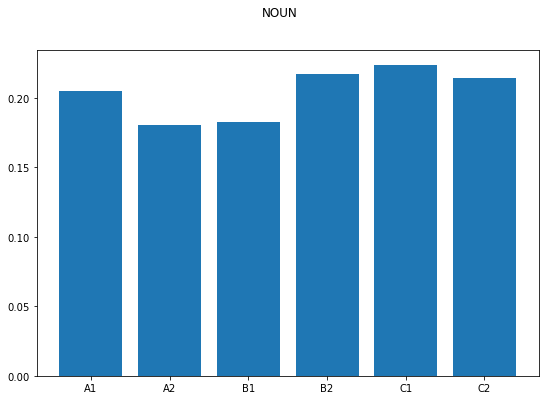

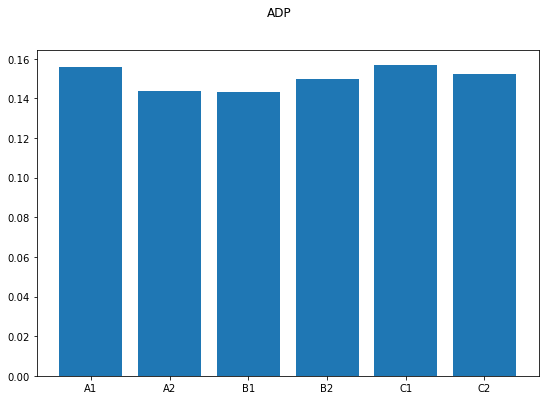

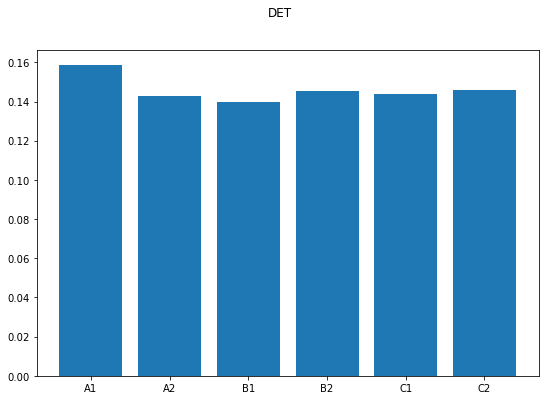

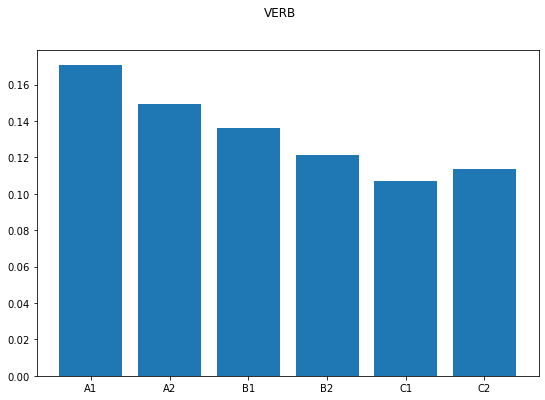

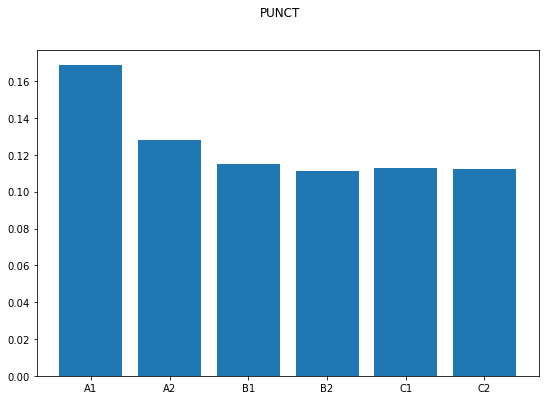

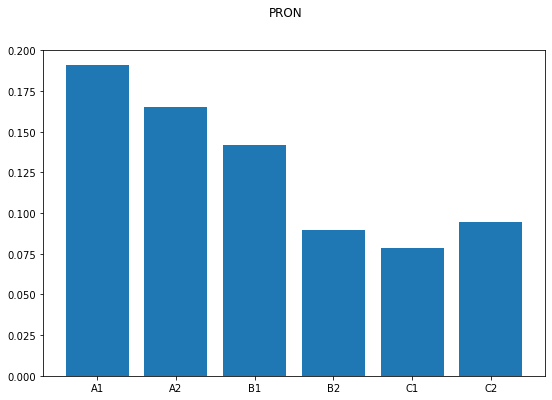

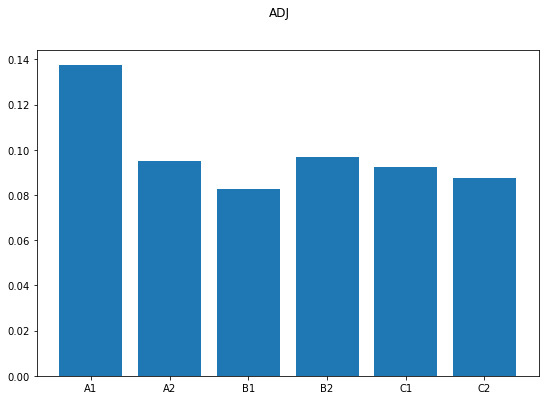

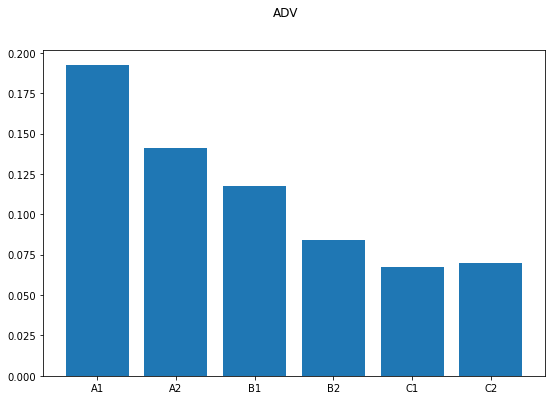

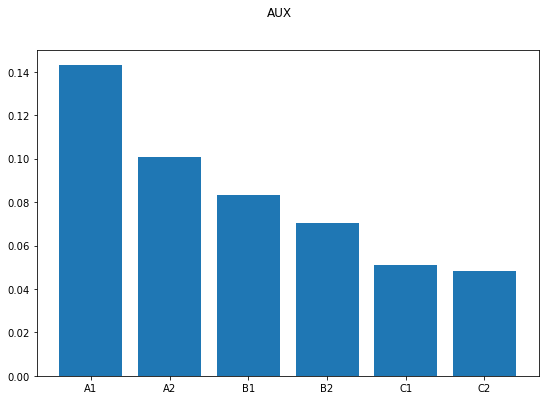

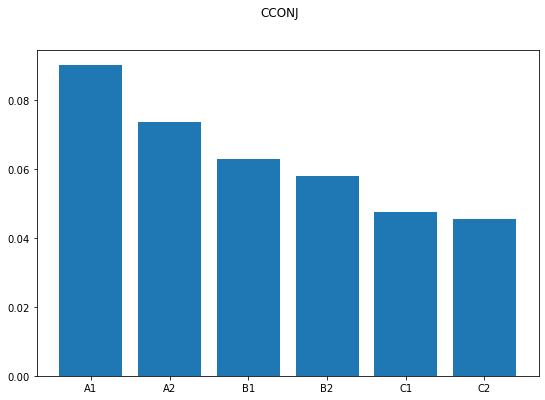

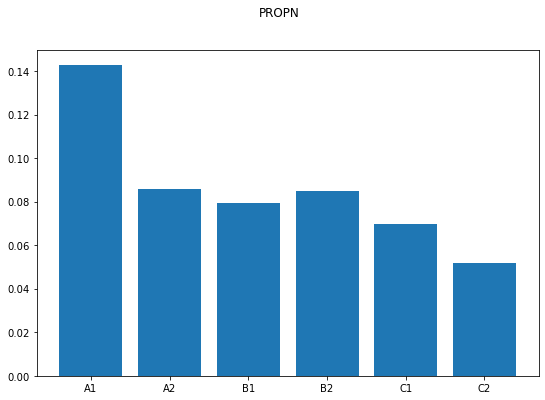

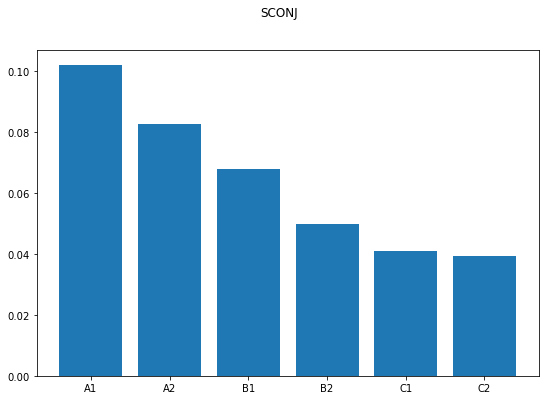

In [46]:

for pos in y[:12]:
    counts = {'A1':[], 'A2':[], 'B1':[], 'B2':[], 'C1':[], 'C2':[]}
    fig, ax = plt.subplots(1,1, figsize=(9,6))
    
    for i, row in trainDf.iterrows():
        tokens = nlp(row.sentence)
        tokens = [tok.pos_ for tok in tokens]
        
        proportion = len([tok for tok in tokens if tok==pos]) / len(tokens)
        
        if pos in tokens:
            counts[row.difficulty].append(proportion)

    avg_proportion = [np.mean(props) for props in counts.values()]
    
    fig.suptitle(f"{pos}")
    ax.bar(counts.keys(), avg_proportion)
    plt.show()


##### Hard to identify any relevant relationship...

#### 1.4.2 Dependancies

C:\Users\Alex\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alex\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


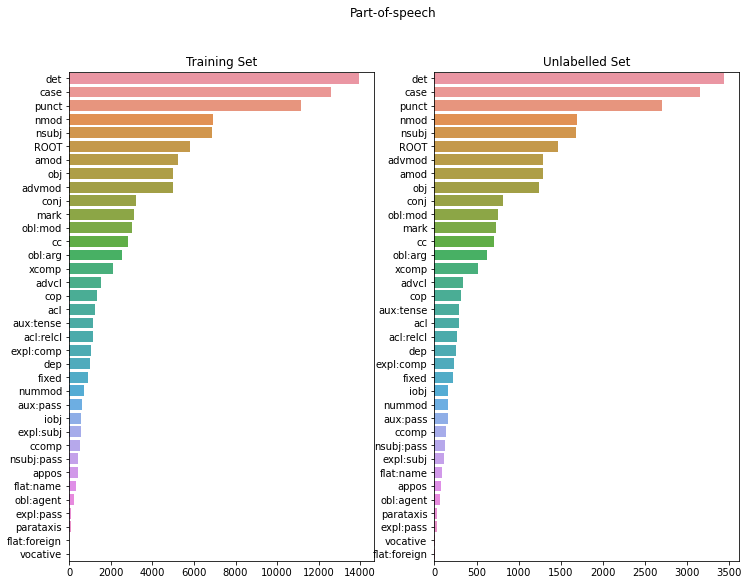

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12, 9))

c = Counter()
for sent in testDf.sentence:
    c += Counter([token.dep_ for token in nlp(sent)])

c = c.most_common()


c2 = Counter()
for sent in trainDf.sentence:
    c2 += Counter([token.dep_ for token in nlp(sent)])

c2 = c2.most_common()

x = [i[1] for i in c]
y = [i[0] for i in c]

x2 = [i[1] for i in c2]
y2 = [i[0] for i in c2]

fig.suptitle("Part-of-speech")
ax[0].set_title("Training Set")
ax[1].set_title("Unlabelled Set")

sns.barplot(x, y, orient='h', ax=ax[1])
sns.barplot(x2, y2, orient='h', ax=ax[0])



#### Same analysis as before, can dependancies explain difficulty ?

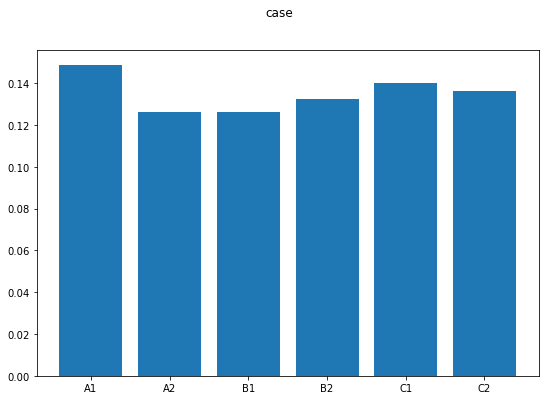

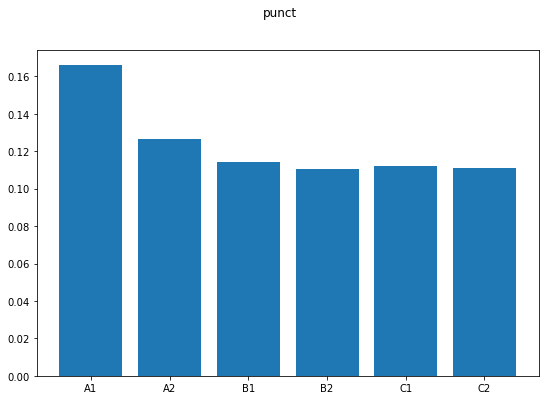

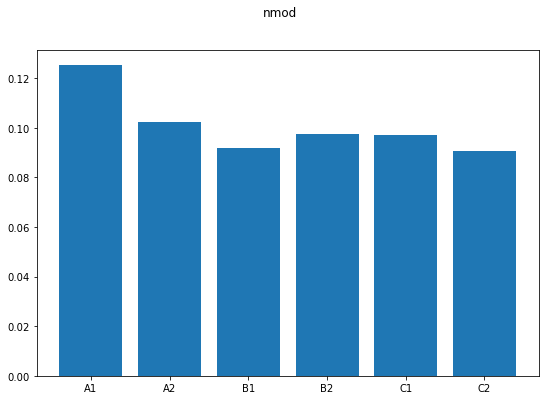

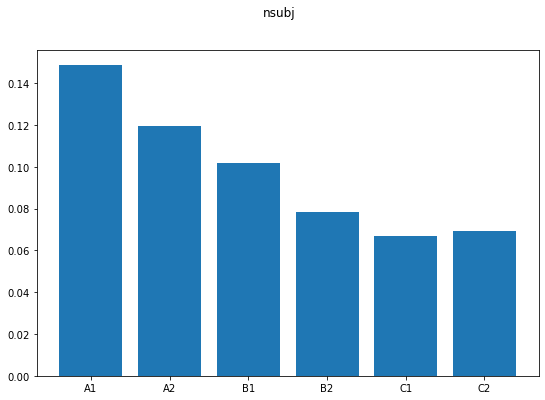

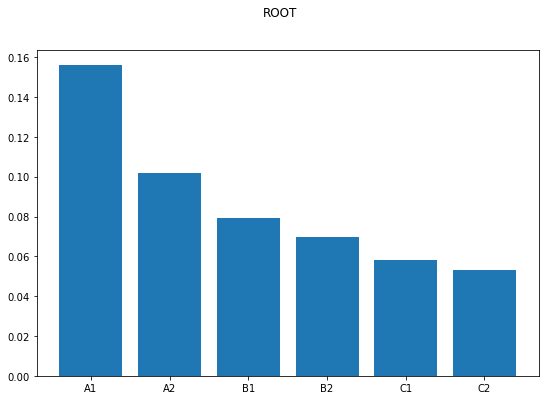

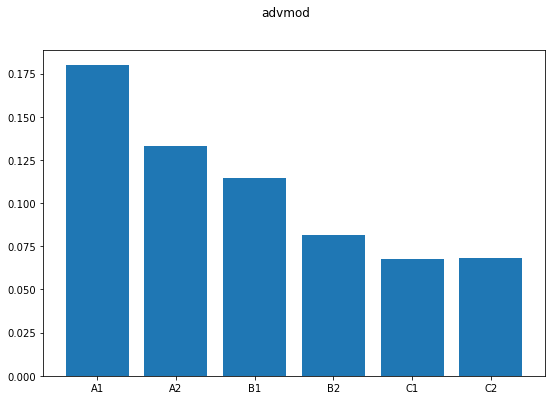

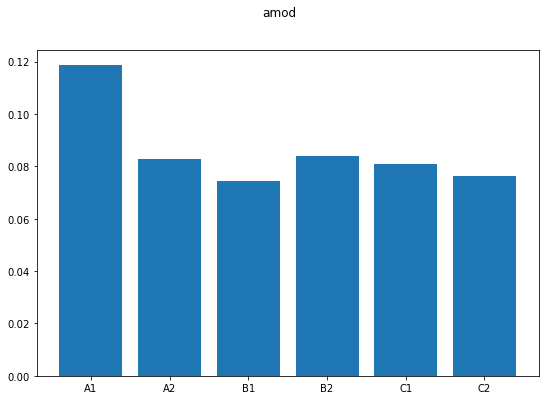

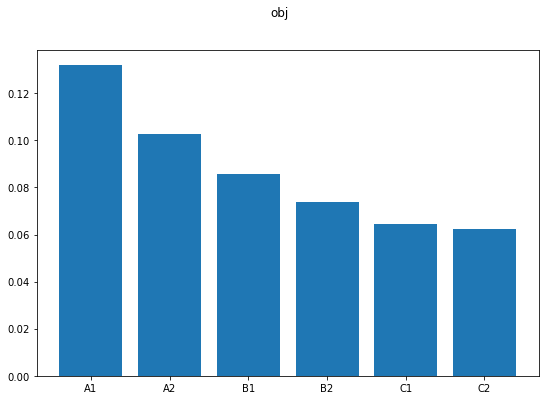

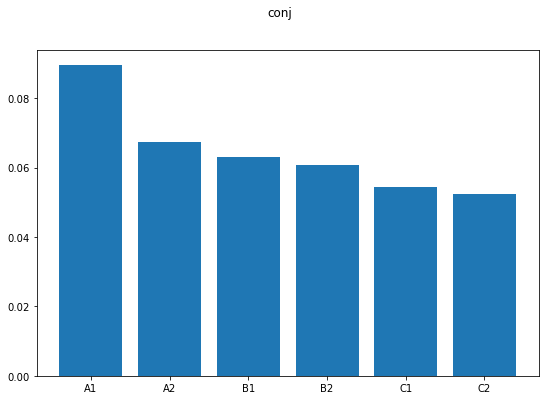

In [49]:

for dep in y[1:10]:
    counts = {'A1':[], 'A2':[], 'B1':[], 'B2':[], 'C1':[], 'C2':[]}
    fig, ax = plt.subplots(1,1, figsize=(9,6))
    
    for i, row in trainDf.iterrows():
        tokens = nlp(row.sentence)
        tokens = [tok.dep_ for tok in tokens]
        
        proportion = len([tok for tok in tokens if tok==dep]) / len(tokens)
        
        if dep in tokens:
            counts[row.difficulty].append(proportion)

    avg_proportion = [np.mean(props) for props in counts.values()]
    
    fig.suptitle(f"{dep}")
    ax.bar(counts.keys(), avg_proportion)
    plt.show()


##### Again, hard to identify any relevant pattern..